In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost.sklearn import XGBClassifier

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
file = "D:\\Akash\\Banking Finance - DataSet.csv"
file_data = pd.read_csv(file)
print("Data imported successfully")

file_data.head(10)

Data imported successfully


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,8/9/1990,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,1/6/1988,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,4/10/1989,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,1/6/1968,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [5]:
file_data.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [6]:
file_data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [7]:
cat=file_data.select_dtypes('object').columns
cat

Index(['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH'],
      dtype='object')

In [8]:
list(zip(file_data.columns,file_data.dtypes,file_data.nunique()))

[('UniqueID', dtype('int64'), 233154),
 ('disbursed_amount', dtype('int64'), 24565),
 ('asset_cost', dtype('int64'), 46252),
 ('ltv', dtype('float64'), 6579),
 ('branch_id', dtype('int64'), 82),
 ('supplier_id', dtype('int64'), 2953),
 ('manufacturer_id', dtype('int64'), 11),
 ('Current_pincode_ID', dtype('int64'), 6698),
 ('Date.of.Birth', dtype('O'), 15433),
 ('Employment.Type', dtype('O'), 2),
 ('DisbursalDate', dtype('O'), 84),
 ('State_ID', dtype('int64'), 22),
 ('Employee_code_ID', dtype('int64'), 3270),
 ('MobileNo_Avl_Flag', dtype('int64'), 1),
 ('Aadhar_flag', dtype('int64'), 2),
 ('PAN_flag', dtype('int64'), 2),
 ('VoterID_flag', dtype('int64'), 2),
 ('Driving_flag', dtype('int64'), 2),
 ('Passport_flag', dtype('int64'), 2),
 ('PERFORM_CNS.SCORE', dtype('int64'), 573),
 ('PERFORM_CNS.SCORE.DESCRIPTION', dtype('O'), 20),
 ('PRI.NO.OF.ACCTS', dtype('int64'), 108),
 ('PRI.ACTIVE.ACCTS', dtype('int64'), 40),
 ('PRI.OVERDUE.ACCTS', dtype('int64'), 22),
 ('PRI.CURRENT.BALANCE', dty

In [9]:
file_data["Employment.Type"].fillna('Others',inplace=True)

In [10]:
dummy=pd.get_dummies(file_data['Employment.Type'],drop_first=True,prefix='Employment.Type')
file_data=pd.concat((file_data,dummy),axis=1)
list(zip(file_data.columns,file_data.dtypes,file_data.nunique()))

[('UniqueID', dtype('int64'), 233154),
 ('disbursed_amount', dtype('int64'), 24565),
 ('asset_cost', dtype('int64'), 46252),
 ('ltv', dtype('float64'), 6579),
 ('branch_id', dtype('int64'), 82),
 ('supplier_id', dtype('int64'), 2953),
 ('manufacturer_id', dtype('int64'), 11),
 ('Current_pincode_ID', dtype('int64'), 6698),
 ('Date.of.Birth', dtype('O'), 15433),
 ('Employment.Type', dtype('O'), 3),
 ('DisbursalDate', dtype('O'), 84),
 ('State_ID', dtype('int64'), 22),
 ('Employee_code_ID', dtype('int64'), 3270),
 ('MobileNo_Avl_Flag', dtype('int64'), 1),
 ('Aadhar_flag', dtype('int64'), 2),
 ('PAN_flag', dtype('int64'), 2),
 ('VoterID_flag', dtype('int64'), 2),
 ('Driving_flag', dtype('int64'), 2),
 ('Passport_flag', dtype('int64'), 2),
 ('PERFORM_CNS.SCORE', dtype('int64'), 573),
 ('PERFORM_CNS.SCORE.DESCRIPTION', dtype('O'), 20),
 ('PRI.NO.OF.ACCTS', dtype('int64'), 108),
 ('PRI.ACTIVE.ACCTS', dtype('int64'), 40),
 ('PRI.OVERDUE.ACCTS', dtype('int64'), 22),
 ('PRI.CURRENT.BALANCE', dty

In [11]:
del file_data['Employment.Type']

In [12]:
def change_col_month(col):
    year=int(col.split()[0].replace('yrs',''))
    month=int(col.split()[1].replace('mon',''))
    return year*12+month
def calculate_age(dob):
    if int (dob[-2:])<19:
        year=int('20'+dob[-2:])
    else:
        year= int('19'+dob[-2:])
    return (pd.to_datetime('today').year-year)

In [13]:
file_data['Age']=file_data['Date.of.Birth'].apply(calculate_age)
del file_data['Date.of.Birth']

file_data['AVERAGE.ACCT.AGE']=file_data['AVERAGE.ACCT.AGE'].apply(change_col_month)
file_data['CREDIT.HISTORY.LENGTH']=file_data['CREDIT.HISTORY.LENGTH'].apply(change_col_month)

In [14]:
file_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,DisbursalDate,State_ID,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Salaried,Employment.Type_Self employed,Age
0,420825,50578,58400,89.55,67,22807,45,1441,3/8/2018,6,...,0,0,0,0,0,0,0,1,0,37
1,537409,47145,65550,73.23,67,22807,45,1502,26-09-18,6,...,0,0,1,23,23,0,1,0,1,36
2,417566,53278,61360,89.63,67,22807,45,1497,1/8/2018,6,...,0,0,0,0,0,0,0,0,1,36
3,624493,57513,66113,88.48,67,22807,45,1501,26-10-18,6,...,0,0,0,8,15,1,1,0,1,28
4,539055,52378,60300,88.39,67,22807,45,1495,26-09-18,6,...,0,0,0,0,0,1,1,0,1,44


In [15]:
file_data['DisbursalDate']=file_data['DisbursalDate'].astype('datetime64')

In [16]:
file_data['DisbursalMonth']=file_data['DisbursalDate'].dt.month
file_data['DisbursalMonth']

0          3
1          9
2          1
3         10
4          9
          ..
233149    10
233150    10
233151    10
233152     9
233153    10
Name: DisbursalMonth, Length: 233154, dtype: int64

In [17]:
file_data['DisbursalMonth']=pd.to_numeric(file_data['DisbursalMonth'])

In [18]:
del file_data['DisbursalDate']

In [19]:
del file_data['PERFORM_CNS.SCORE.DESCRIPTION']

In [20]:
file_data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONE

In [21]:
file_data.drop(['UniqueID','branch_id','supplier_id','manufacturer_id','Current_pincode_ID','State_ID','Employee_code_ID'],axis=1,inplace=True)

In [22]:
file_data.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Salaried,Employment.Type_Self employed,Age,DisbursalMonth
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,37,3
1,47145,65550,73.23,1,1,0,0,0,0,598,...,0,1,23,23,0,1,0,1,36,9
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,36,1
3,57513,66113,88.48,1,1,0,0,0,0,305,...,0,0,8,15,1,1,0,1,28,10
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,44,9


In [23]:
file_data.drop(['MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag'],axis=1,inplace=True)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

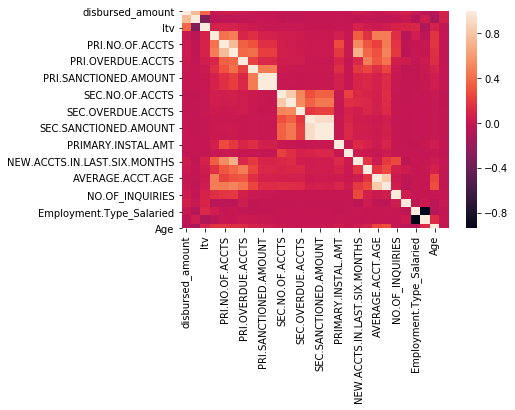

In [25]:
sns.heatmap(file_data.corr())

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
cat=file_data.select_dtypes('object').columns

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [42]:
file_new=file_data.drop('loan_default',axis=1)
file_new

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Employment.Type_Salaried,Employment.Type_Self employed,Age,DisbursalMonth
0,50578,58400,89.55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,37,3
1,47145,65550,73.23,598,1,1,1,27600,50200,50200,1991,0,1,23,23,0,0,1,36,9
2,53278,61360,89.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36,1
3,57513,66113,88.48,305,3,0,0,0,0,0,31,0,0,8,15,1,0,1,28,10
4,52378,60300,88.39,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,44,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,735,4,3,0,390443,416133,416133,4084,0,0,21,39,0,1,0,33,10
233150,73651,100600,74.95,825,1,0,0,0,0,0,1565,0,0,6,6,0,0,1,33,10
233151,33484,71212,48.45,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,45,10
233152,34259,73286,49.10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,27,9


In [30]:
file_target=file_data['loan_default']
file_target

0         0
1         1
2         0
3         1
4         1
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: loan_default, Length: 233154, dtype: int64

In [31]:
forest=RandomForestClassifier(n_estimators=100,random_state=42)

In [43]:
forest.fit(file_new,file_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [44]:
importances=forest.feature_importances_
importances

array([0.16984294, 0.17875047, 0.18084193, 0.03642372, 0.01983776,
       0.01118643, 0.00576401, 0.03382298, 0.03179903, 0.03172032,
       0.03240661, 0.0086909 , 0.00544152, 0.03211336, 0.034718  ,
       0.01406219, 0.00666584, 0.00680925, 0.11343823, 0.04566451])

In [45]:
feat_imp_df=pd.DataFrame({'features':file_new.columns,'importance':forest.feature_importances_})

feat_imp_df.sort_values('importance',ascending=False)

,features,importance
2,ltv,0.180842
1,asset_cost,0.178750
0,disbursed_amount,0.169843
18,Age,0.113438
19,DisbursalMonth,0.045665
3,PERFORM_CNS.SCORE,0.036424
14,CREDIT.HISTORY.LENGTH,0.034718
7,PRI.CURRENT.BALANCE,0.033823
10,PRIMARY.INSTAL.AMT,0.032407
13,AVERAGE.ACCT.AGE,0.032113


In [35]:
file_data.drop(['SEC.OVERDUE.ACCTS','SEC.ACTIVE.ACCTS'],axis=1,inplace=True)

In [36]:
file_data.head()

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Salaried,Employment.Type_Self employed,Age,DisbursalMonth
0,50578,58400,89.55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,37,3
1,47145,65550,73.23,598,1,1,1,27600,50200,50200,...,0,1,23,23,0,1,0,1,36,9
2,53278,61360,89.63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,36,1
3,57513,66113,88.48,305,3,0,0,0,0,0,...,0,0,8,15,1,1,0,1,28,10
4,52378,60300,88.39,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,44,9


In [ ]:
file_data.drop(['Employment.Type_Salaried','Employment.Type_Self employed','PRI.OVERDUE.ACCTS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NEW.ACCTS.IN.LAST.SIX.MONTHS'],axis=1,inplace=True)

In [41]:
file_data.drop(['SEC.NO.OF.ACCTS','SEC.DISBURSED.AMOUNT','SEC.SANCTIONED.AMOUNT','SEC.CURRENT.BALANCE','SEC.INSTAL.AMT'],axis=1,inplace=True)

Dropped the above variables due the lower feature importance in the table

In [46]:
file_data.shape

(233154, 21)

In [47]:
train,test=train_test_split(file_data,test_size=0.2,random_state=2)

In [48]:
train.head()

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Salaried,Employment.Type_Self employed,Age,DisbursalMonth
105676,43639,66604,70.57,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,31,8
98886,56013,68894,84.19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,26,8
163595,58013,80870,74.19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,58,8
208851,52578,64516,84.48,738,1,1,0,10564,20000,20000,...,0,0,6,6,0,1,0,1,39,3
185222,54303,73000,75.34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,44,9


In [49]:
test.head()

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Salaried,Employment.Type_Self employed,Age,DisbursalMonth
154537,51503,66100,79.43,832,2,0,0,0,0,0,...,0,0,3,5,0,0,0,1,42,9
168253,56259,71534,79.68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,25,12
140397,61547,73652,84.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,47,10
196005,46349,70634,66.54,816,4,3,0,2408134,2741489,2741489,...,0,0,39,71,0,0,0,1,48,12
65204,71123,100565,71.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,51,10


In [50]:
del test['loan_default']

In [51]:
test.shape

(46631, 20)

In [52]:
train.shape

(186523, 21)

In [53]:
# Notice that only train data is used for imputing missing values in both train and test 

x_train=train.drop('loan_default',axis=1)
y_train=train['loan_default']

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [55]:
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
       'C':[0.01,1000,10]}

In [56]:
model=LogisticRegression(fit_intercept=True)

In [57]:
grid_search=GridSearchCV(model,param_grid=params,cv=5,scoring="roc_auc")

In [58]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 1000, 10],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [59]:
logr=grid_search.best_estimator_

In [60]:
grid_search.best_estimator_

LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.8f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [62]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.61933869 (std: 0.00378)
Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1'}

Model with rank: 2
Mean validation score: 0.61933412 (std: 0.00379)
Parameters: {'C': 1000, 'class_weight': 'balanced', 'penalty': 'l1'}

Model with rank: 3
Mean validation score: 0.61919807 (std: 0.00372)
Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l1'}

Model with rank: 4
Mean validation score: 0.61919224 (std: 0.00374)
Parameters: {'C': 1000, 'class_weight': None, 'penalty': 'l1'}

Model with rank: 5
Mean validation score: 0.61788946 (std: 0.00352)
Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}



In [63]:
logr.fit(x_train,y_train)

LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
cutoffs=np.linspace(0.01,0.99,99)

cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [65]:
train_score=logr.predict_proba(x_train)[:,1]

real=y_train

In [66]:
from sklearn.metrics import fbeta_score

In [67]:
f_all=[]
KS_all=[]
Accuracy=[]

for cutoff in cutoffs:
    
    predicted=(train_score>cutoff).astype(int)

    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
      
    KS=(TP/P)-(FP/N)
    
    KS_all.append(KS)
    f=fbeta_score(predicted, real, beta=1)
    f_all.append(f)
   

In [68]:
mycutoff=cutoffs[KS_all==max(KS_all)][0]
mycutoff

0.49

In [69]:
f_all

[0.3567051276967879,
 0.3567120318275742,
 0.35672208000493477,
 0.35672646036299227,
 0.3567421795476277,
 0.3567607111064104,
 0.3567959239441834,
 0.3568113195071959,
 0.3568408755262636,
 0.3569138780243669,
 0.3569358872016971,
 0.3570227953535773,
 0.35708832550031994,
 0.35717691519796557,
 0.3573337810314434,
 0.3574725449625975,
 0.3576906227459588,
 0.3579199149539334,
 0.35813375909171546,
 0.35839351864189967,
 0.3586861729581576,
 0.35904844714957757,
 0.3594210930935226,
 0.3599634254569577,
 0.360428730712513,
 0.36107864154349545,
 0.3618742832276401,
 0.36257789439160387,
 0.36357639859098795,
 0.3645618645826129,
 0.3656109689791105,
 0.3669848399775407,
 0.3683224390589235,
 0.36972106236534535,
 0.3712286248578204,
 0.37250030506406345,
 0.3739423866683819,
 0.37580715674795606,
 0.37751644409009366,
 0.37935077726417604,
 0.3815428829931611,
 0.3833005283331607,
 0.3846747840100273,
 0.38684701707491304,
 0.3886909400224848,
 0.3898365666674883,
 0.3907521269979676

In [70]:
maxF=cutoffs[f_all==max(f_all)][0]
maxF

0.47000000000000003

In [71]:
max(f_all)

0.3907521269979676

In [108]:
logr.intercept_

array([-2.73658299])

In [68]:
KS_all

[0.00013279106025687604,
 0.00016971731727621897,
 0.00022033854618652704,
 0.00025310614455209546,
 0.00032158100400747625,
 0.00041597597588283186,
 0.0005761569799216382,
 0.0006568569799059176,
 0.0007923368674545017,
 0.0011237050201319265,
 0.0012535564176643366,
 0.0016519295984348537,
 0.0019571268032595457,
 0.002403181550216127,
 0.0031585921606512857,
 0.0038660703694677334,
 0.0048665206425798635,
 0.005969683204875231,
 0.007028319517907389,
 0.008378458063873384,
 0.009852819517355726,
 0.011695224545101968,
 0.01365916365307318,
 0.01639296084966857,
 0.018784599403185887,
 0.021986428454702778,
 0.025922157498321274,
 0.029581012260160078,
 0.034394654154935256,
 0.03931853796866913,
 0.04456106312368624,
 0.05097891786947628,
 0.05742778436560292,
 0.06419475535091335,
 0.07142853919521552,
 0.07819536945559002,
 0.08544052039042105,
 0.09423072997585025,
 0.10258212842743164,
 0.11146924590585783,
 0.12138126393845394,
 0.13023321557468437,
 0.1378674281648371,
 0.147

In [72]:
gbm_params={'n_estimators':[100,200,500,700],
           'learning_rate': [0.01,.05,0.1,0.4,0.8,1],
            'max_depth':[1,2,3,4,5,6],
            'subsample':[0.5,0.8,1],
            'max_features':[5,10,15]
           }


In [73]:
gbm=GradientBoostingClassifier()

In [74]:
random_search=RandomizedSearchCV(gbm,scoring='roc_auc',param_distributions=gbm_params,
                                 cv=5,n_iter=10,
                                 n_jobs=-1)

In [75]:
random_search.fit(x_train,y_train)
# this might take upto 30-45 miins to finish , if you try cv=10 and larger number for n_iter
# ( dont be impatient :) . Also dont be alarmed if it finishes early :))

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [76]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [77]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.639 (std: 0.00330)
Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_features': 15, 'max_depth': 5, 'learning_rate': 0.05}

Model with rank: 2
Mean validation score: 0.638 (std: 0.00340)
Parameters: {'subsample': 1, 'n_estimators': 700, 'max_features': 10, 'max_depth': 2, 'learning_rate': 0.05}

Model with rank: 3
Mean validation score: 0.632 (std: 0.00407)
Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_features': 15, 'max_depth': 5, 'learning_rate': 0.01}

Model with rank: 4
Mean validation score: 0.632 (std: 0.00369)
Parameters: {'subsample': 1, 'n_estimators': 200, 'max_features': 5, 'max_depth': 2, 'learning_rate': 0.05}

Model with rank: 5
Mean validation score: 0.631 (std: 0.00453)
Parameters: {'subsample': 1, 'n_estimators': 100, 'max_features': 10, 'max_depth': 1, 'learning_rate': 1}



top 5 classfiers from the previous run were as follows : 

Model with rank: 1
Mean validation score: 0.639 (std: 0.00330)
Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_features': 15, 'max_depth': 5, 'learning_rate': 0.05}

Model with rank: 2
Mean validation score: 0.638 (std: 0.00340)
Parameters: {'subsample': 1, 'n_estimators': 700, 'max_features': 10, 'max_depth': 2, 'learning_rate': 0.05}

Model with rank: 3
Mean validation score: 0.632 (std: 0.00407)
Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_features': 15, 'max_depth': 5, 'learning_rate': 0.01}

Model with rank: 4
Mean validation score: 0.632 (std: 0.00369)
Parameters: {'subsample': 1, 'n_estimators': 200, 'max_features': 5, 'max_depth': 2, 'learning_rate': 0.05}

Model with rank: 5
Mean validation score: 0.631 (std: 0.00453)
Parameters: {'subsample': 1, 'n_estimators': 100, 'max_features': 10, 'max_depth': 1, 'learning_rate': 1}

# Xgboost

In [78]:
xgb_params = {  
                "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "gamma":[i/10.0 for i in range(0,5)],
                "max_depth": [2,3,4,5,6,7,8],
                "min_child_weight":[1,2,5,10],
                "max_delta_step":[0,1,2,5,10],
                "subsample":[i/10.0 for i in range(5,10)],
                "colsample_bytree":[i/10.0 for i in range(5,10)],
                "colsample_bylevel":[i/10.0 for i in range(5,10)],
                "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], 
                "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
                "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
                "n_estimators":[100,500,700,1000]
             }


In [79]:
import xgboost as xgbp

In [80]:
xgb=xgbp.XGBClassifier(objective='binary:logistic')

In [81]:
n_iter=10

random_search=RandomizedSearchCV(xgb,n_jobs=-1,cv=5,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=xgb_params)

In [82]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 5, 10

In [83]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.641 (std: 0.00330)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 7, 'reg_lambda': 100, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 10, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.9}

Model with rank: 2
Mean validation score: 0.640 (std: 0.00339)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 6, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 3, 'max_delta_step': 10, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8}

Model with rank: 3
Mean validation score: 0.637 (std: 0.00349)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 4, 'reg_lambda': 1e-05, 'reg_alpha': 0.01, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.6}

Model with rank: 4
M

top 5 classfiers from the previous run 

Model with rank: 1
Mean validation score: 0.641 (std: 0.00330)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 7, 'reg_lambda': 100, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 2, 'max_depth': 3, 'max_delta_step': 10, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.9}

Model with rank: 2
Mean validation score: 0.640 (std: 0.00339)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 6, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 3, 'max_delta_step': 10, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8}

Model with rank: 3
Mean validation score: 0.637 (std: 0.00349)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 4, 'reg_lambda': 1e-05, 'reg_alpha': 0.01, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 3, 'max_delta_step': 2, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.6}

Model with rank: 4
Mean validation score: 0.637 (std: 0.00264)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 1, 'reg_lambda': 100, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 1, 'learning_rate': 0.5, 'gamma': 0.3, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.9}

Model with rank: 5
Mean validation score: 0.637 (std: 0.00269)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 1, 'reg_lambda': 100, 'reg_alpha': 100, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 2, 'max_delta_step': 1, 'learning_rate': 0.5, 'gamma': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5}


In [84]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=10, max_depth=3,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=100, scale_pos_weight=7, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Sequential Parameter tuning for xgboost

If we tune all the paramters together , there are chances that our results will be much far from the best. There are many parameters where variation doesnt impact the performance too much and we can tune them later once we have fixed values of parameters with volatile performance.

As a general strategy we can start with tuning numer of trees or n_estimators , in case of boosting machines , learning_rate is directly related with n_estimators . A very low learning_rate will need high number of n_estimators . We can start with a decent fixed learning rate and tune n_estimaors for it. 

In [85]:
xgb_params = {  
                "n_estimators":[100,500,700]
             }

In [86]:
xgb1=xgbp.XGBClassifier(learning_rate=0.05,subsample=0.6,colsample_bylevel=0.9,colsample_bytree=0.6)

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
grid_search=GridSearchCV(xgb1,cv=5,param_grid=xgb_params,scoring='roc_auc',verbose=2,n_jobs=-1)

In [89]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 22.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.9,
                                     colsample_bynode=None,
                                     colsample_bytree=0.6, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.05, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraint...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, 

In [90]:
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.641 (std: 0.00306)
Parameters: {'n_estimators': 500}

Model with rank: 2
Mean validation score: 0.640 (std: 0.00343)
Parameters: {'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.640 (std: 0.00296)
Parameters: {'n_estimators': 700}



we got n_estimator=500 as best with learning_rate=0.05  . Next we'll tune max_depth,gamma and min_child_weight, which control overfit by controlling size of individual trees

In [91]:
xgb_params={
            "gamma":[0,2,5,8,10],
            "max_depth": [2,3,4,5,6,8,10],
            "min_child_weight":[0.5,1,2,5,10]
            }

In [92]:
xgb2=xgbp.XGBClassifier(learning_rate=0.05,subsample=0.6,colsample_bylevel=0.9,colsample_bytree=0.6,n_estimators=500)

In [ ]:
grid_search=GridSearchCV(xgb2,param_grid=xgb_params,cv=5,scoring='roc_auc',
                                 n_jobs=-1,verbose=2)

In [93]:
random_search=RandomizedSearchCV(xgb2,param_distributions=xgb_params,cv=5,n_iter=10, scoring='roc_auc',
                                 n_jobs=-1,verbose=2)

In [94]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 42.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=0.9,
                                           colsample_bynode=None,
                                           colsample_bytree=0.6, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.05,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_cons...
                                           reg_lambda=None,
                                           scale_pos_weight=None, subsample=0.6,
                                           tree_method=None,
                      

In [95]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.643 (std: 0.00332)
Parameters: {'min_child_weight': 1, 'max_depth': 6, 'gamma': 8}

Model with rank: 2
Mean validation score: 0.642 (std: 0.00339)
Parameters: {'min_child_weight': 0.5, 'max_depth': 5, 'gamma': 8}

Model with rank: 3
Mean validation score: 0.642 (std: 0.00345)
Parameters: {'min_child_weight': 10, 'max_depth': 4, 'gamma': 0}



we got best values for parameters being tuned as follows : {'min_child_weight': 1, 'gamma': 8, 'max_depth': 6}

Since there is imbalance in the data , we'll look into max_delta_step and scale_pos_weight next

In [96]:
xgb_params={
            'max_delta_step':[0,1,3,6,10],
            'scale_pos_weight':[1,2,3,4]
            }

In [100]:
xgb3=xgbp.XGBClassifier(min_child_weight=1,gamma=8,max_depth=6,
                  learning_rate=0.05,subsample=0.6,colsample_bylevel=0.9,colsample_bytree=0.6,n_estimators=500)

In [101]:
grid_search=GridSearchCV(xgb3,param_grid=xgb_params,cv=5,scoring='roc_auc',n_jobs=-1,verbose=10)

In [102]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 581.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 591.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 855.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 869.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 903.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 928.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 969.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 1004.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 1052.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 1084.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 1106.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.9,
                                     colsample_bynode=None,
                                     colsample_bytree=0.6, gamma=8, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.05, max_delta_step=None,
                                     max_depth=6, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=0.6, tree_method=None

In [103]:
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.643 (std: 0.00329)
Parameters: {'max_delta_step': 3, 'scale_pos_weight': 1}

Model with rank: 2
Mean validation score: 0.643 (std: 0.00332)
Parameters: {'max_delta_step': 0, 'scale_pos_weight': 1}

Model with rank: 2
Mean validation score: 0.643 (std: 0.00332)
Parameters: {'max_delta_step': 6, 'scale_pos_weight': 1}

Model with rank: 2
Mean validation score: 0.643 (std: 0.00332)
Parameters: {'max_delta_step': 10, 'scale_pos_weight': 1}



it turns out that , since imbalance was not that severe , defaults come out as best choices {'scale_pos_weight': 1, 'max_delta_step': 3}

Next we check the effect of the noise on data and tune , subsample , colsample_bytree and colsample_bylevel

In [104]:
xgb_params={
            'subsample':[i/10 for i in range(5,11)],
            'colsample_bytree':[i/10 for i in range(5,11)],
            'colsample_bylevel':[i/10 for i in range(5,11)]
            }

In [105]:
xgb4=xgbp.XGBClassifier(min_child_weight=1,gamma=8,max_depth=6,
                  learning_rate=0.05,n_estimators=500,
                        scale_pos_weight=1,max_delta_step=3
                  )

In [ ]:
min_child_weight=10,gamma=10,max_depth=6,
                  learning_rate=0.1,subsample=0.7,colsample_bylevel=0.8,colsample_bytree=0.5,n_estimators=500

In [109]:
random_search=RandomizedSearchCV(xgb4,param_distributions=xgb_params,cv=5,n_iter=10,scoring='roc_auc',
                                n_jobs=-1,verbose=20)

In [110]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 46

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=8,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.05, max_delta_step=3,
                                           max_depth=6, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints=No...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                  

In [111]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.642 (std: 0.00289)
Parameters: {'subsample': 0.7, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.9}

Model with rank: 2
Mean validation score: 0.642 (std: 0.00305)
Parameters: {'subsample': 0.8, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}

Model with rank: 3
Mean validation score: 0.642 (std: 0.00294)
Parameters: {'subsample': 0.7, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.9}



The best value that we got here is {'colsample_bylevel': 0.5, 'colsample_bytree': 0.6, 'subsample': 1.0}, but the performance has gone down. May be the default was doing better and wasnt picked as one of the candidates here in the random_search. we'll go with those defaults values instead

In [113]:
xgb5=xgbp.XGBClassifier(min_child_weight=1,gamma=8,max_depth=6,
                  learning_rate=0.05,subsample=0.6,colsample_bylevel=0.9,colsample_bytree=0.6,n_estimators=500,
                        scale_pos_weight=1,max_delta_step=3)

If we want to simply get cv performance of a model , without having to select any parameters we can make use of cross_validation_score function

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
cross_val_score(xgb5,x_train,y_train,scoring='roc_auc',verbose=10,n_jobs=-1,cv=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed: 26.1min remaining: 26.1min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 26.2min remaining: 11.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 35.2min finished


array([0.64482213, 0.64506709, 0.64593844, 0.64489516, 0.63953044,
       0.63823534, 0.63920442, 0.64010355, 0.63948859, 0.65196486])

In [116]:
t_score=grid_search.predict_proba(x_train)[:,1]

In [117]:
fb_all=[]
KSvalue_all=[]

for cutoff in cutoffs:
    
    predicted=(t_score>cutoff).astype(int)

    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
      
    KSvalue=(TP/P)-(FP/N)
    
    KSvalue_all.append(KSvalue)
    fb=fbeta_score(predicted, real, beta=1)
    fb_all.append(fb)
    

In [118]:
maxFb=cutoffs[fb_all==max(fb_all)][0]
maxFb

0.21000000000000002

In [119]:
max(fb_all)

0.4216347235426025

To submit probability scores , I am doing this:

In [120]:
test_score=grid_search.predict_proba(test)[:,1]
pd.DataFrame(test_score).to_csv("mysubmission_bank_finance.csv",index=False)

In [121]:
test_score

array([0.1159777 , 0.25764084, 0.3030352 , ..., 0.13514903, 0.24300048,
       0.3132214 ], dtype=float32)

Submitting the hardclasses:

In [122]:
test_classes=(test_score>mycutoff).astype(int)

In [123]:
a=pd.DataFrame(test_classes,columns=['cls'])
a['cls'].value_counts()
#a.info()

0    46411
1      220
Name: cls, dtype: int64

In [124]:
np.unique(test_classes,return_counts=True)

(array([0, 1]), array([46411,   220], dtype=int64))

In [125]:
pd.DataFrame(test_classes).to_csv("mysubmission.csv",index=False)